<a href="https://colab.research.google.com/github/Andrej40701/Oracle-Tool/blob/main/Task_1_11_03_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/oracle/data/DAX 11-3-22.csv',index_col=False)

In [ ]:
data.head()

,Time,Course,Day Before,Piece,Accumulated
0,16:59:59,13.716.930,-4.13%,4.42,112.977.897
1,16:59:58,13.718.590,-4.11%,8.622,112.973.476
2,16:59:57,13.718.750,-4.11%,16.971,112.964.854
3,16:59:56,13.718.740,-4.11%,5.202,112.947.883
4,16:59:55,13.719.080,-4.11%,1.348,112.942.681


# Missing values

In [ ]:
missing_values = data.isnull().sum()
percentage = 100 * data.isnull().sum() / len(data)
missing_values_table = pd.concat([missing_values, percentage], axis=1)
missing_values_table.columns = ['Num. of missing values','% of missing values']
missing_values_table

,Num. of missing values,% of missing values
Time,0,0.0
Course,0,0.0
Day Before,0,0.0
Piece,0,0.0
Accumulated,0,0.0


# Prepering the data


In [ ]:
len(data)

28624

In [ ]:
data.dtypes

Time           object
Course         object
Day Before     object
Piece          object
Accumulated    object
dtype: object

In [ ]:
i = data[(data.Course == 'Kurs')].index

In [ ]:
data = data.drop(i)

In [ ]:
data.reset_index(inplace=True)
data

,index,Time,Course,Day Before,Piece,Accumulated
0,0,16:59:59,13.716.930,-4.13%,4.42,112.977.897
1,1,16:59:58,13.718.590,-4.11%,8.622,112.973.476
2,2,16:59:57,13.718.750,-4.11%,16.971,112.964.854
3,3,16:59:56,13.718.740,-4.11%,5.202,112.947.883
4,4,16:59:55,13.719.080,-4.11%,1.348,112.942.681
...,...,...,...,...,...,...
28618,28619,09:03:01,13.482.360,-5.94%,25.713,3.429.575
28619,28620,09:03:00,13.487.590,-5.90%,11.404,3.403.862
28620,28621,09:02:59,13.484.430,-5.92%,12.636,3.392.458
28621,28622,09:02:58,13.483.000,-5.93%,10.332,3.379.822


In [ ]:
data = data.drop(columns='index')

In [ ]:
for i in range(len(data)):
  temp = data.Course[i]
  one,two,three = temp.split('.')
  temp2 = float(one+two)
  temp3 = float('0.'+three)
  data.Course[i] = temp2 + temp3

In [ ]:
data.Course[0]

13716.93

In [ ]:
for i in range(len(data)):
  temp = data.Accumulated[i]
  one,two,three = temp.split('.')
  temp2 = float(one+two)
  temp3 = float('0.'+three)
  data.Accumulated[i] = temp2 + temp3

In [ ]:
data.Accumulated[0]

112977.897

#Growth or decline limits

* Се зема разлика на логаритмите на цените во соседни времиња r(n) =  ln p(n+1) - ln p(n). Тоа е добивка (return) за еден чекор. Растот, или падот може да се земе да биде средна вредност R = (r(1)+r(2) + r(T-1)) / (T-1) на добивките за време на некој период Т (да речиме Т=10, или Т=50 последователни времиња). Поефикасно е ако се земе ln p(Т+1) - ln p(1). 
* За да ја најдиме психолошката граница - дали имало раст, пад или неодредено, 
за периодот Т, која овозможува машинско учење треба да направиме статистичка анализа на податоците.
* За разни вредности на средниот раст R = 0,05%, 0,1% или повеќе/помалку да се види колку случаи има на раст или пад поголем од границата. 
* Ќе направиме една табела, или график од тоа и ќе одлучиме колку да земиме да биде границата со која би пробале прво. Ова е за работа со класификација. Ако се работи со регресија нема потреба од ова


T = 10,30,60,120

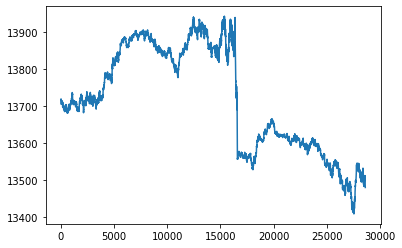

In [ ]:
plt.plot(data.Course)

In [ ]:
data = data[data.Course != 0]

In [ ]:
data.reset_index(inplace=True)
data

,index,Time,Course,Day Before,Piece,Accumulated
0,0,16:59:59,13716.93,-4.13%,4.42,112977.897
1,1,16:59:58,13718.59,-4.11%,8.622,112973.476
2,2,16:59:57,13718.75,-4.11%,16.971,112964.854
3,3,16:59:56,13718.74,-4.11%,5.202,112947.883
4,4,16:59:55,13719.08,-4.11%,1.348,112942.681
...,...,...,...,...,...,...
28618,28618,09:03:01,13482.36,-5.94%,25.713,3429.575
28619,28619,09:03:00,13487.59,-5.90%,11.404,3403.862
28620,28620,09:02:59,13484.43,-5.92%,12.636,3392.458
28621,28621,09:02:58,13483.0,-5.93%,10.332,3379.822


In [ ]:
data = data.drop(columns='index')

In [ ]:
r=0
x=0
times10 =[]
times30 = []
times60 = []
times120 = []

In [ ]:
for i in range(len(data)-1):
  p0 = data["Course"][i]
  p1 = data["Course"][i+1]
  temp = math.log(abs(p1)) - math.log(abs(p0))
  r=r+temp
  x=x+1
  if(x==10):
    x=0
    times10.append(r)

In [ ]:
for i in range(len(data)-1):
  p0 = data["Course"][i]
  p1 = data["Course"][i+1]
  temp = math.log(abs(p1)) - math.log(abs(p0))
  r=r+temp
  x=x+1
  if(x==30):
    x=0
    times30.append(r)

In [ ]:
for i in range(len(data)-1):
  p0 = data["Course"][i]
  p1 = data["Course"][i+1]
  temp = math.log(abs(p1)) - math.log(abs(p0))
  r=r+temp
  x=x+1
  if(x==60):
    x=0
    times60.append(r)

In [ ]:
for i in range(len(data)-1):
  p0 = data["Course"][i]
  p1 = data["Course"][i+1]
  temp = math.log(abs(p1)) - math.log(abs(p0))
  r=r+temp
  x=x+1
  if(x==120):
    x=0
    times120.append(r)

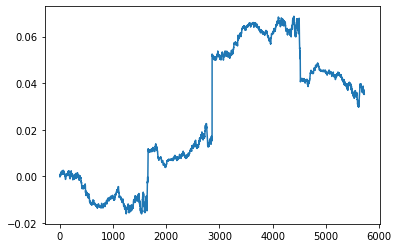

In [ ]:
plt.plot(times10)

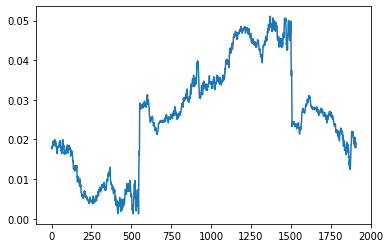

In [ ]:
plt.plot(times30)

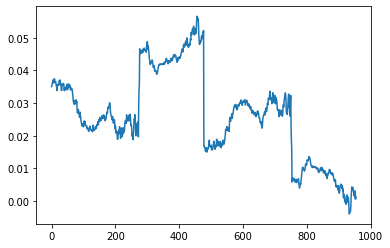

In [ ]:
plt.plot(times60)

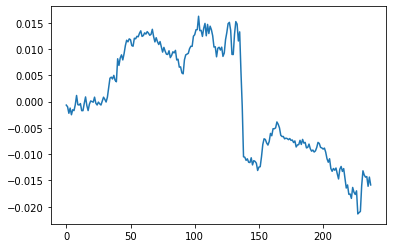

In [ ]:
plt.plot(times120)

In [ ]:
r10 =sum(times10)/9
r10

16.644783006520385

In [ ]:
r30 =sum(times30)/29
r30

1.7220948966076384

In [ ]:
r60 =sum(times60)/59
r60

0.4231737226454556

In [ ]:
r120 =sum(times120)/119
r120

6.789292932235374e-05